Data Preparation and Transformation for Airlines Data science analysis

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 31 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]

        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)

        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())

        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []

    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

In [ ]:
df.sample(10)


,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews
2054,Family Leisure,Economy Class,AGP to LGW,June 2016,2.0,2.0,2.0,NaN,3.0,NaN,3,no,NaN,✅ Verified Review | I think that British Airw...
1699,Business,Business Class,MLA to LGW,January 2017,2.0,3.0,NaN,NaN,3.0,NaN,2,no,A320,✅ Verified Review | The decline of British Ai...
1660,Business,Premium Economy,Chicago to London Heathrow,February 2017,1.0,1.0,1.0,1.0,1.0,1.0,1,no,Boeing 747,✅ Verified Review | Chicago to London Heathro...
1315,Business,Economy Class,Belfast City to London Heathrow,September 2017,3.0,4.0,4.0,NaN,5.0,NaN,2,yes,A319,✅ Verified Review | Flew British Airways from...
2762,Couple Leisure,Business Class,Gatwick to Barbados,NaN,3.0,4.0,3.0,4.0,NaN,NaN,3,no,Boeing 777,Flew Club World from Gatwick to Barbados in Ap...
314,Business,Business Class,Kingston to London,August 2021,1.0,2.0,2.0,3.0,2.0,1.0,1,no,NaN,✅ Trip Verified | I claimed my miles right af...
1292,Couple Leisure,Business Class,Barcelona to London,September 2017,2.0,3.0,1.0,NaN,4.0,NaN,2,no,NaN,✅ Verified Review | BA used to be a nice airli...
2672,Business,First Class,New York to Dublin via Heathrow,July 2015,2.0,3.0,2.0,1.0,1.0,NaN,1,no,Boeing 747,This review is written due to what I feel is t...
1190,Solo Leisure,Business Class,London to Santiago,November 2017,5.0,5.0,4.0,4.0,4.0,NaN,5,yes,Boeing 787-900,✅ Trip Verified | Great flight out from London...
2922,NaN,Economy Class,NaN,NaN,4.0,3.0,2.0,1.0,NaN,NaN,3,no,NaN,Comfortable seats and plenty of space but the ...


In [ ]:
df.to_csv("BA_reviews.csv", index=False)


Now we have our dataset obtained from the reviews website for Data preparation initial stage! The loops above collected 3100 reviews by iterating through the paginated pages on the website. However, if you want to perform real-time data the relevant method of implementing streaming data pipeline is optimal, however not in scope of this project.

The next stage is to perform Data cleaning like removing duplicates, irrelevant redundant text For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df = pd.read_csv('BA_reviews.csv')


In [ ]:
df

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews
0,Business,Economy Class,New York to London,April 2023,4.0,3.0,3.0,3.0,1.0,4.0,1,no,NaN,✅ Trip Verified | Despite being a gold member...
1,Couple Leisure,Business Class,Singapore to London,April 2023,4.0,2.0,1.0,5.0,3.0,1.0,1,no,Boeing 787,Not Verified | Regarding the aircraft and seat...
2,Couple Leisure,Economy Class,Sweden to Los Angeles via London,January 2023,3.0,3.0,3.0,2.0,3.0,NaN,1,no,NaN,Not Verified | I travelled with British Airway...
3,Couple Leisure,Premium Economy,Seattle to Zagreb via London,April 2023,3.0,2.0,1.0,1.0,3.0,1.0,2,no,Boeing 777,Not Verified | Food was lousy. Who ever is pl...
4,Family Leisure,Premium Economy,"Bangalore to Toronto via London,",April 2023,2.0,1.0,2.0,3.0,1.0,NaN,1,no,Boeing 777,✅ Trip Verified | Had the worst experience. Th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,NaN,Economy Class,NaN,NaN,2.0,2.0,3.0,4.0,NaN,NaN,1,no,NaN,British Airways for some reason was incapable ...
3096,NaN,Premium Economy,NaN,NaN,5.0,5.0,4.0,1.0,NaN,NaN,5,yes,NaN,BA216 from Washington to London in World Trave...
3097,NaN,Economy Class,NaN,NaN,5.0,5.0,5.0,1.0,NaN,NaN,5,yes,NaN,LHR-BGO on A319. Flight on time and only half ...
3098,NaN,Premium Economy,NaN,NaN,4.0,4.0,3.0,3.0,NaN,NaN,4,yes,NaN,LHR-SFO-LHR. Out in economy and return in econ...


In [ ]:
df.shape


(3100, 14)

In [ ]:
df.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
count,2999.000000,2989.000000,2755.000000,2041.000000,2699.000000,546.000000,3100.000000
mean,2.848283,3.242891,2.684936,2.667320,2.831419,1.946886,2.653226
std,1.358634,1.483923,1.441491,1.389229,1.447154,1.366345,1.457831
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000



There are total of 14 attributes/ features that can be cleaned for better prepared data


In [ ]:
remove_text = ['✅ Trip Verified', 'Not Verified |','✅ Verified Review |','|' ]

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

<ipython-input-9-ed9cbea9ffbc>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['reviews'] = df['reviews'].str.replace(j,'')


In [ ]:
df.sample(10)


,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews
2092,Family Leisure,Business Class,LHR to CDG,May 2016,4.0,5.0,4.0,NaN,2.0,NaN,3,yes,A320,✅ Verified Review London to Paris CDG in bus...
2583,Family Leisure,Economy Class,Cape Town to London Heathrow,August 2015,1.0,2.0,1.0,1.0,3.0,NaN,1,no,NaN,"Absolutely disgusted, delayed by 45 min with n..."
2321,Couple Leisure,Economy Class,LIS to LHR,December 2015,3.0,1.0,3.0,1.0,3.0,NaN,3,no,A320,London Heathrow to Lisbon return with British ...
2414,Solo Leisure,Economy Class,Gatwick to Venice,November 2015,4.0,5.0,4.0,NaN,5.0,NaN,5,yes,A320/319,Gatwick to Venice with British Airways. The pl...
1942,Business,Business Class,LHR to IST,September 2016,4.0,5.0,4.0,2.0,4.0,NaN,4,yes,Boeing 767,"✅ Verified Review BA club Europe, London Hea..."
2142,Business,Economy Class,AMS to HKG via LHR,April 2016,1.0,2.0,1.0,3.0,3.0,1.0,2,no,A380,✅ Verified Review Amsterdam to Hong Kong via...
1401,Couple Leisure,Economy Class,London Heathrow to Tallinn,July 2017,4.0,5.0,4.0,NaN,3.0,NaN,4,yes,A320,✅ Verified Review London Heathrow to Tallinn...
3061,NaN,Premium Economy,NaN,NaN,2.0,1.0,1.0,1.0,NaN,NaN,3,no,NaN,SAN-MUC for a conference. I hold Oneworld Sapp...
790,Family Leisure,Economy Class,Prague to London Heathrow,February 2019,3.0,1.0,NaN,NaN,3.0,NaN,2,no,NaN,Prague to London Heathrow. Very disappointi...
2046,Couple Leisure,Economy Class,LAX to FCO via LHR,June 2016,1.0,2.0,2.0,4.0,2.0,NaN,1,no,A380,✅ Verified Review Los Angeles to Rome via Lo...


Perform the data cleaning of reviews text data in all columns removing further redundancies.

In [ ]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)


In [ ]:
df.head(5)

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews,Cleaned Reviews
0,Business,Economy Class,New York to London,April 2023,4.0,3.0,3.0,3.0,1.0,4.0,1,no,NaN,"Despite being a gold member, the British Ai...",Despite being a gold member the British Airwa...
1,Couple Leisure,Business Class,Singapore to London,April 2023,4.0,2.0,1.0,5.0,3.0,1.0,1,no,Boeing 787,Not Verified Regarding the aircraft and seat:...,Not Verified Regarding the aircraft and seat T...
2,Couple Leisure,Economy Class,Sweden to Los Angeles via London,January 2023,3.0,3.0,3.0,2.0,3.0,NaN,1,no,NaN,Not Verified I travelled with British Airways...,Not Verified I travelled with British Airways ...
3,Couple Leisure,Premium Economy,Seattle to Zagreb via London,April 2023,3.0,2.0,1.0,1.0,3.0,1.0,2,no,Boeing 777,Not Verified Food was lousy. Who ever is pla...,Not Verified Food was lousy Who ever is planni...
4,Family Leisure,Premium Economy,"Bangalore to Toronto via London,",April 2023,2.0,1.0,2.0,3.0,1.0,NaN,1,no,Boeing 777,Had the worst experience. The flight from Lo...,Had the worst experience The flight from Lond...


Now to understand the sentiments or brief succint nature of the review better. We will be implementing a steps of Natural Language Processing such as Tokenization, enrichment - PoS tagging, Stopwords removal, Lemmatization

In [ ]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews,Cleaned Reviews,POS tagged
0,Business,Economy Class,New York to London,April 2023,4.0,3.0,3.0,3.0,1.0,4.0,1,no,NaN,"Despite being a gold member, the British Ai...",Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri..."
1,Couple Leisure,Business Class,Singapore to London,April 2023,4.0,2.0,1.0,5.0,3.0,1.0,1,no,Boeing 787,Not Verified Regarding the aircraft and seat:...,Not Verified Regarding the aircraft and seat T...,"[(Verified, n), (Regarding, v), (aircraft, n),..."
2,Couple Leisure,Economy Class,Sweden to Los Angeles via London,January 2023,3.0,3.0,3.0,2.0,3.0,NaN,1,no,NaN,Not Verified I travelled with British Airways...,Not Verified I travelled with British Airways ...,"[(Verified, n), (travelled, v), (British, a), ..."
3,Couple Leisure,Premium Economy,Seattle to Zagreb via London,April 2023,3.0,2.0,1.0,1.0,3.0,1.0,2,no,Boeing 777,Not Verified Food was lousy. Who ever is pla...,Not Verified Food was lousy Who ever is planni...,"[(Verified, v), (Food, n), (lousy, n), (ever, ..."
4,Family Leisure,Premium Economy,"Bangalore to Toronto via London,",April 2023,2.0,1.0,2.0,3.0,1.0,NaN,1,no,Boeing 777,Had the worst experience. The flight from Lo...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo..."


In [ ]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews,Cleaned Reviews,POS tagged,Lemma
0,Business,Economy Class,New York to London,April 2023,4.0,3.0,3.0,3.0,1.0,4.0,1,no,NaN,"Despite being a gold member, the British Ai...",Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri...",Despite gold member British Airways staff He...
1,Couple Leisure,Business Class,Singapore to London,April 2023,4.0,2.0,1.0,5.0,3.0,1.0,1,no,Boeing 787,Not Verified Regarding the aircraft and seat:...,Not Verified Regarding the aircraft and seat T...,"[(Verified, n), (Regarding, v), (aircraft, n),...",Verified Regarding aircraft seat business cl...
2,Couple Leisure,Economy Class,Sweden to Los Angeles via London,January 2023,3.0,3.0,3.0,2.0,3.0,NaN,1,no,NaN,Not Verified I travelled with British Airways...,Not Verified I travelled with British Airways ...,"[(Verified, n), (travelled, v), (British, a), ...",Verified travel British Airways Sweden Los A...
3,Couple Leisure,Premium Economy,Seattle to Zagreb via London,April 2023,3.0,2.0,1.0,1.0,3.0,1.0,2,no,Boeing 777,Not Verified Food was lousy. Who ever is pla...,Not Verified Food was lousy Who ever is planni...,"[(Verified, v), (Food, n), (lousy, n), (ever, ...",Verified Food lousy ever plan Asian Hindu Ve...
4,Family Leisure,Premium Economy,"Bangalore to Toronto via London,",April 2023,2.0,1.0,2.0,3.0,1.0,NaN,1,no,Boeing 777,Had the worst experience. The flight from Lo...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo...",bad experience flight London Toronto get del...


In [ ]:
df1 = df[['reviews','Lemma']]


In [ ]:
df1.head(5)

,reviews,Lemma
0,"Despite being a gold member, the British Ai...",Despite gold member British Airways staff He...
1,Not Verified Regarding the aircraft and seat:...,Verified Regarding aircraft seat business cl...
2,Not Verified I travelled with British Airways...,Verified travel British Airways Sweden Los A...
3,Not Verified Food was lousy. Who ever is pla...,Verified Food lousy ever plan Asian Hindu Ve...
4,Had the worst experience. The flight from Lo...,bad experience flight London Toronto get del...


## Sentiment Analysis by Implementing Valence Aware Dictionary and Sentiment Reasoner(VADER)

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.4 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,Aircraft,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Business,Economy Class,New York to London,April 2023,4.0,3.0,3.0,3.0,1.0,4.0,1,no,NaN,"Despite being a gold member, the British Ai...",Despite being a gold member the British Airwa...,"[(Despite, None), (gold, n), (member, n), (Bri...",Despite gold member British Airways staff He...,0.7951,Positive
1,Couple Leisure,Business Class,Singapore to London,April 2023,4.0,2.0,1.0,5.0,3.0,1.0,1,no,Boeing 787,Not Verified Regarding the aircraft and seat:...,Not Verified Regarding the aircraft and seat T...,"[(Verified, n), (Regarding, v), (aircraft, n),...",Verified Regarding aircraft seat business cl...,0.8676,Positive
2,Couple Leisure,Economy Class,Sweden to Los Angeles via London,January 2023,3.0,3.0,3.0,2.0,3.0,NaN,1,no,NaN,Not Verified I travelled with British Airways...,Not Verified I travelled with British Airways ...,"[(Verified, n), (travelled, v), (British, a), ...",Verified travel British Airways Sweden Los A...,-0.7902,Negative
3,Couple Leisure,Premium Economy,Seattle to Zagreb via London,April 2023,3.0,2.0,1.0,1.0,3.0,1.0,2,no,Boeing 777,Not Verified Food was lousy. Who ever is pla...,Not Verified Food was lousy Who ever is planni...,"[(Verified, v), (Food, n), (lousy, n), (ever, ...",Verified Food lousy ever plan Asian Hindu Ve...,-0.5574,Negative
4,Family Leisure,Premium Economy,"Bangalore to Toronto via London,",April 2023,2.0,1.0,2.0,3.0,1.0,NaN,1,no,Boeing 777,Had the worst experience. The flight from Lo...,Had the worst experience The flight from Lond...,"[(worst, a), (experience, n), (flight, n), (Lo...",bad experience flight London Toronto get del...,0.1546,Neutral


In [ ]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    1788
Negative     974
Neutral      338
Name: Analysis, dtype: int64

In [ ]:
!pip install flask


In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


--2023-05-02 13:57:57--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.237.133.81, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.28M  3.34MB/s    in 5.0s    

2023-05-02 13:58:02 (2.67 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!pip install pyngrok


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.2/681.2 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-6.0.0-py3-none-any.whl size=19879 sha256=fc9302f786ee1a6f1ecd255ff4add7f07b7d4cb8fe7cfa3b799b0b8e324978d2
  Stored in directory: /root/.cache/pip/wheels/5c/42/78/0c3d438d7f5730451a25f7ac6cbf4391759d22a67576ed7c2c
Successfully built pyngrok


In [ ]:
%%writefile app.py
from flask import Flask, request, jsonify
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from pyngrok import ngrok

app = Flask(__name__)
analyzer = SentimentIntensityAnalyzer()

def vader_analysis(compound, threshold=0.5):
    if compound >= threshold:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

@app.route('/analyze', methods=['POST'])
def analyze():
    text = request.form.get('text')
    if not text:
        return jsonify({'error': 'Text not provided'}), 400

    sentiment = analyzer.polarity_scores(text)['compound']
    analysis = vader_analysis(sentiment)

    return jsonify({'sentiment': sentiment, 'analysis': analysis})

if __name__ == '__main__':
    # Start the Flask app
    app.run()


Overwriting app.py


In [ ]:
# Start the Flask app in the background
!nohup python app.py &

# Start ngrok and create a tunnel
from pyngrok import ngrok

public_url = ngrok.connect(5000)
print(f"Public URL: {public_url}")


nohup: appending output to 'nohup.out'


Public URL: NgrokTunnel: "https://c201-35-233-192-35.ngrok.io" -> "http://localhost:5000"


In [ ]:
import requests

# Replace this with the public URL printed in the output earlier
public_url = "https://c201-35-233-192-35.ngrok.io"

text = "I love this product! It's amazing."
response = requests.post(f"{public_url}/analyze", data={"text": text})

print(response.json())

{'analysis': 'Positive', 'sentiment': 0.8516}


In [ ]:
%%writefile app.py
from flask import Flask, request, jsonify
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

app = Flask(__name__)
analyzer = SentimentIntensityAnalyzer()

def vader_analysis(compound, threshold=0.5):
    if compound >= threshold:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

@app.route('/analyze', methods=['POST'])
def analyze():
    text = request.form.get('text')
    if not text:
        return jsonify({'error': 'Text not provided'}), 400

    sentiment = analyzer.polarity_scores(text)['compound']
    analysis = vader_analysis(sentiment)

    return jsonify({'sentiment': sentiment, 'analysis': analysis})

if __name__ == '__main__':
    app.run()


Writing app.py


In [ ]:
# Start the Flask app in the background
!nohup python app.py &

# Start ngrok and create a tunnel
get_ipython().system_raw('./ngrok http 5000 &')

# Get the public URL
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"


nohup: appending output to 'nohup.out'
Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


([<matplotlib.patches.Wedge at 0x7f27cb3a2380>,
 [Text(-0.26274760280135434, 1.0681590224410136, 'Positive'),
  Text(-0.11128525334200759, -1.0943562456479177, 'Negative'),
  Text(1.2715734179588336, -0.45343251178151034, 'Neutral')],
 [Text(-0.14331687425528417, 0.5826321940587347, '57.7%'),
  Text(-0.060701047277458675, -0.5969215885352277, '31.4%'),
  Text(0.8006203001963026, -0.285494544455025, '10.9%')])

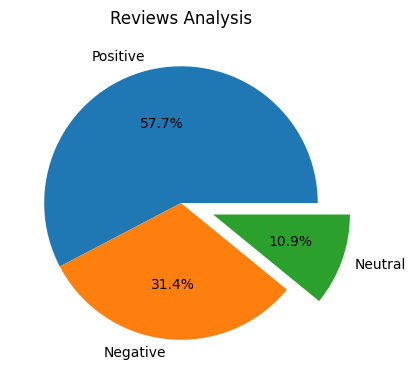

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [ ]:
df.to_csv("BA_reviews.csv")


## Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

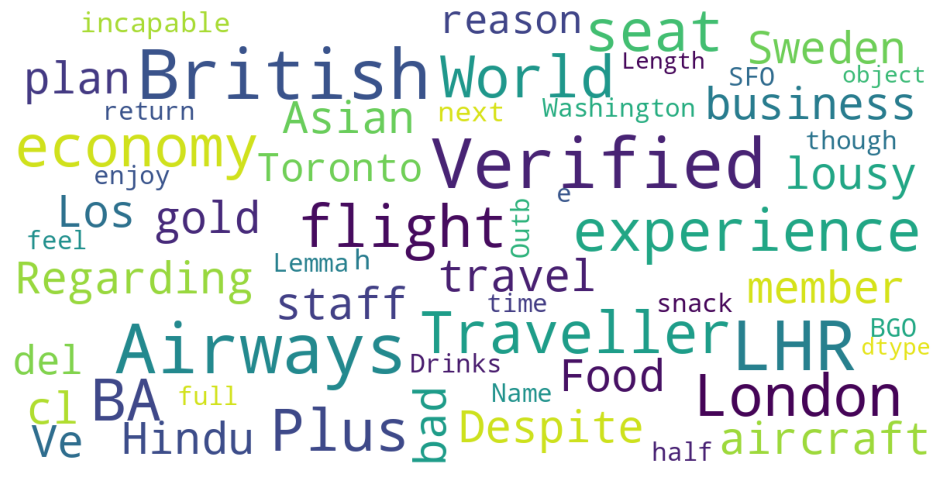

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

Performing Statistical analysis

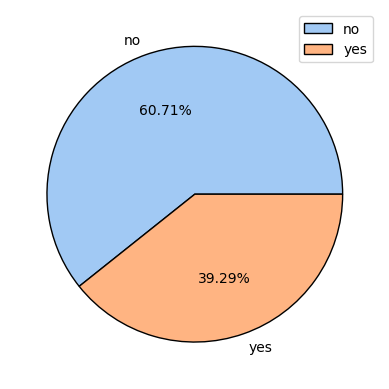

In [ ]:
import seaborn as sns

soc = df.groupby('Recommended')['Cleaned Reviews'].count().reset_index()
plt.pie(soc['Cleaned Reviews'], labels = soc['Recommended'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

In [ ]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Sentiment
count,1783.000000,1773.000000,1579.000000,1194.000000,1686.000000,389.000000,1882.000000,1882.000000
mean,2.125631,2.455725,1.815706,2.045226,2.132266,1.465296,1.716791,0.021151
std,1.086562,1.291528,0.993442,1.136736,1.212571,0.923325,0.898356,0.706331
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-0.992500
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.709600
50%,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.051600
75%,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,2.000000,0.753975
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,0.997100


In [ ]:
data = df_soc[df_soc['Cleaned Reviews'].str.contains('food | drink')]
data['Cleaned Reviews'].to_csv('test.csv')

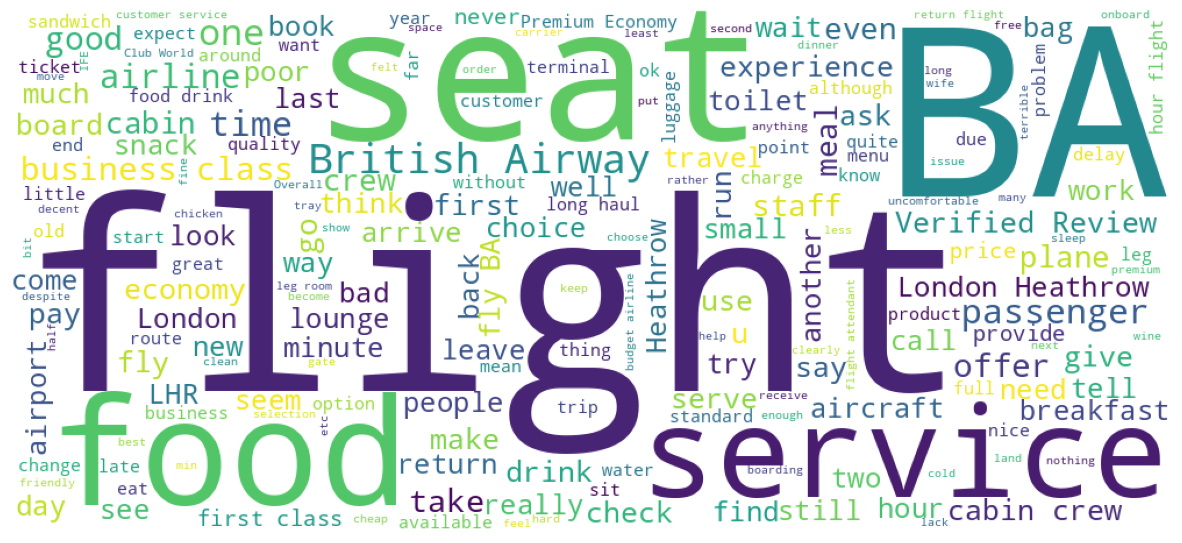

In [ ]:
review_word = []

for i in data['Lemma'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
data = df_soc[df_soc['Lemma'].str.contains('money | refund & value')]
data['Lemma'].to_csv('test2.csv')

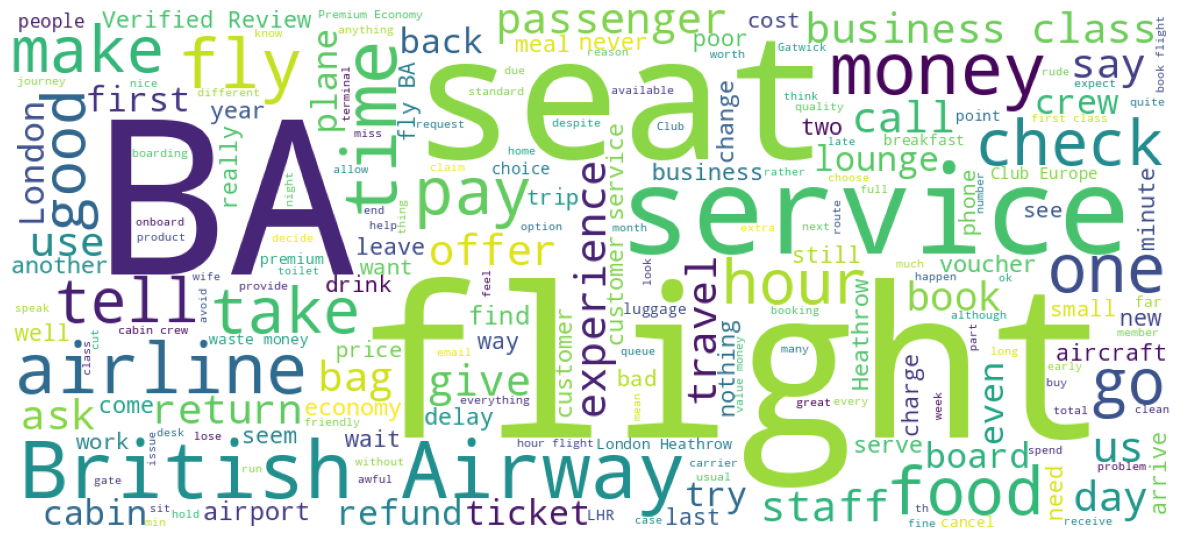

In [ ]:
review_word = []

for i in data['Lemma'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
df_2 = df[df['Analysis'] == 'Negative']
df_2.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Sentiment
count,918.000000,911.000000,801.000000,610.000000,873.000000,233.000000,974.000000,974.000000
mean,2.028322,2.375412,1.801498,2.008197,1.950745,1.420601,1.668378,-0.637008
std,1.108736,1.286280,1.049666,1.125141,1.196747,0.925643,0.969147,0.270412
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.992500
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-0.866650
50%,2.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,-0.709600
75%,3.000000,3.000000,2.000000,3.000000,3.000000,1.000000,2.000000,-0.444400
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,-0.025800


In [ ]:
data = df_2[df_2['Lemma'].str.contains('money | refund & value')]
data['Lemma'].to_csv('test3.csv')

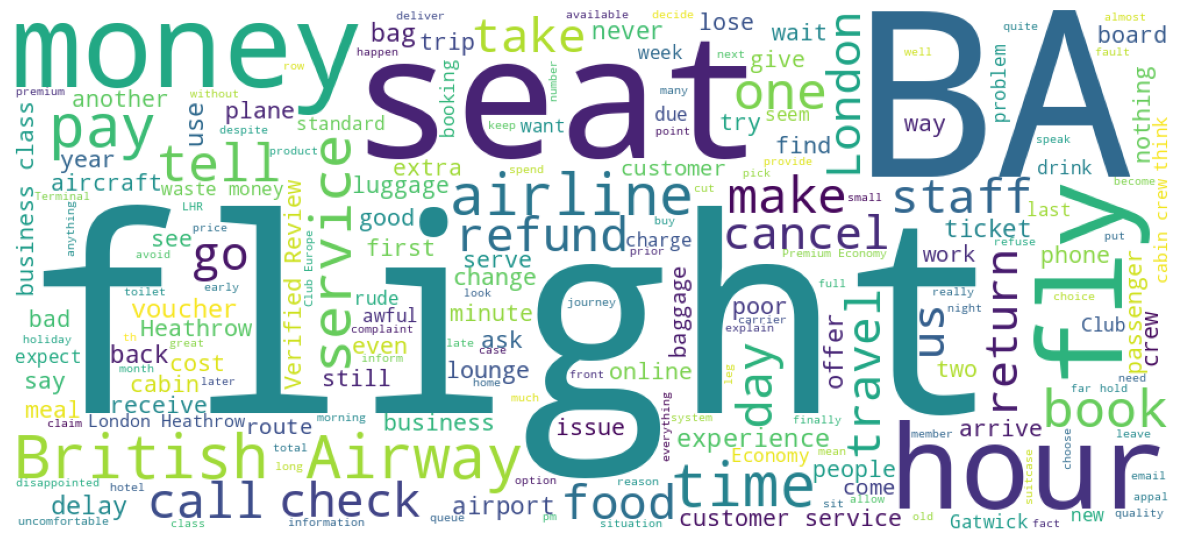

In [ ]:
review_word = []

for i in data['Lemma'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
data = df_2[df_2['Lemma'].str.contains('food | drink')]
data['Lemma'].to_csv('test4.csv')

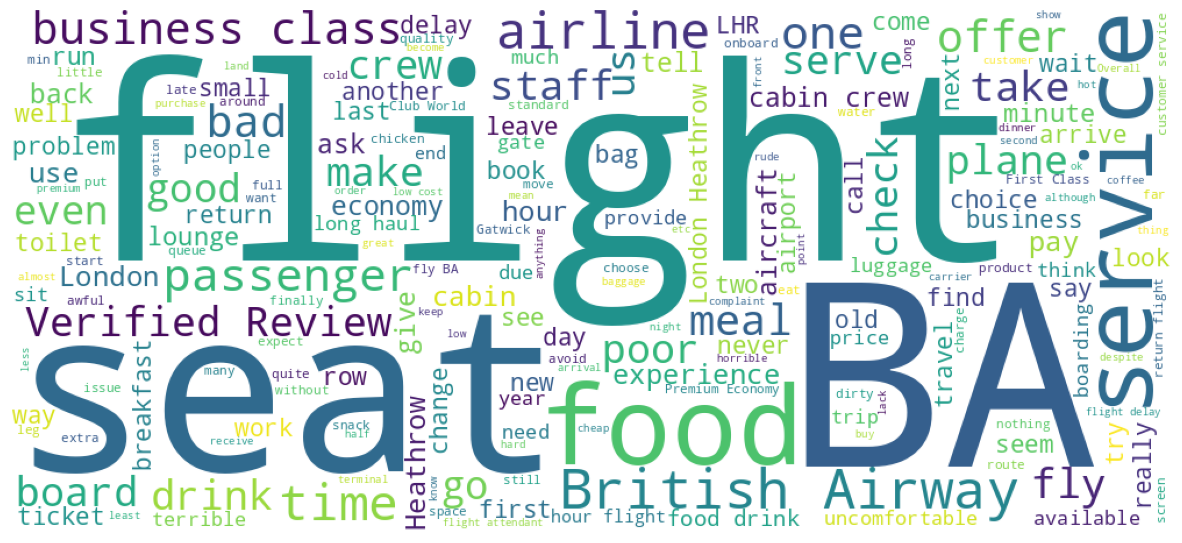

In [ ]:
review_word = []

for i in data['Lemma'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()